**Machine Learning Project: Student Performance Predictor**
***(Part 2. K-Nearest Neighbor, Polynomial Regression, and Random Forest)***

K-Nearest Neighbor(KNN) is another popular machine learning algorithm other than the linear regression that’s been used in part 1 of the project. KNN is an algorithm that makes predictions based on the similarity between new data points and existing data points in a labeled dataset. If the concept of KNN is new to you, this article from IBM may be helpful.

These first few lines of code import all the python modules/packages that are needed for later use.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

The first line of code here loads our data set. The second line of code prints the data for the first 5 students from the file.

In [3]:
# The dataset uses semicolons (;) as the delimiter instead of commas (,).
# By default, pandas reads CSV files using commas as the separator.
# To fix this, we need to specify the delimiter as a semicolon when reading the file.

# Load the dataset with semicolon delimiter
data = pd.read_csv("student-mat.csv", delimiter=";")

# Display the first 5 rows to inspect the dataset and ensure it has been read correctly
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Prepare the Data
Here two data frames are created, where X has all the features but “G3”(the grade that this model is going to predict) and y has “G3”. Similarly to part 1, the last line of the code splits the data into training and testing sets.

In [6]:
from sklearn.model_selection import train_test_split

X = data[["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", "G1", "G2"]]
y = data["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


 ### Implement the Algorithm
 This is the part where the KNN algorithm is implemented. The first line of the code determines this model is going to take account of the 9 nearest data point. The next two lines of the code first fit the data and than use the KNN algorithm to make the prediction. Lastly, the accuracy of the model is calculated by using the score function.

In [8]:
clf = KNeighborsRegressor(9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)

### Train Multiple Models & Save the Model & Average Accuracy

In [9]:
best = 0
acc_total = 0
train_time = 100
for result in range(train_time):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

  clf = KNeighborsRegressor(9)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  acc = clf.score(X_test, y_test)

  print(acc)
  acc_total += acc

  if acc > best:
    best = acc
    with open("final_knn_model.pickle", "wb") as f:
      pickle.dump(KNeighborsRegressor, f)

pickle_in = open("final_knn_model.pickle", "rb")
KNeighborsRegressor = pickle.load(pickle_in)

print('The average accuracy is: ' + str(acc_total/train_time))
print("The mean squared error is: ", mean_squared_error(y_test, y_pred))

0.8403119019978903
0.8297346960031444
0.8703703703703703
0.8168950377330898
0.8624884453393906
0.7959661821719293
0.8858061449036704
0.8753697504295305
0.7634500775573516
0.9103835062549388
0.8341559461495596
0.8151855844755891
0.8839245065745427
0.8058695525178176
0.8322167132568927
0.6639957158568619
0.9017808263291791
0.8299295439398267
0.7100341081822563
0.8026808012123725
0.8922028417547354
0.8595738595738596
0.9124760676747549
0.9243356984268274
0.8172121443487785
0.8921916921866211
0.8465935172434217
0.8780446277102913
0.8416924065825925
0.8759170097258102
0.9242720322409057
0.7760205233681736
0.8054700841918896
0.8543690044273851
0.9139787633770313
0.9064175482236103
0.8269622395086076
0.9063024212639992
0.8486559954449864
0.771691608405077
0.7307536946498963
0.7968237675704958
0.7904377833955298
0.8412115891553752
0.8232547579562505
0.8807598997589929
0.9135983667947138
0.7724666054043976
0.7872162147199516
0.7846928764361076
0.8551941041167911
0.9112038310061202
0.89550999807

### Visualization & Conclusion

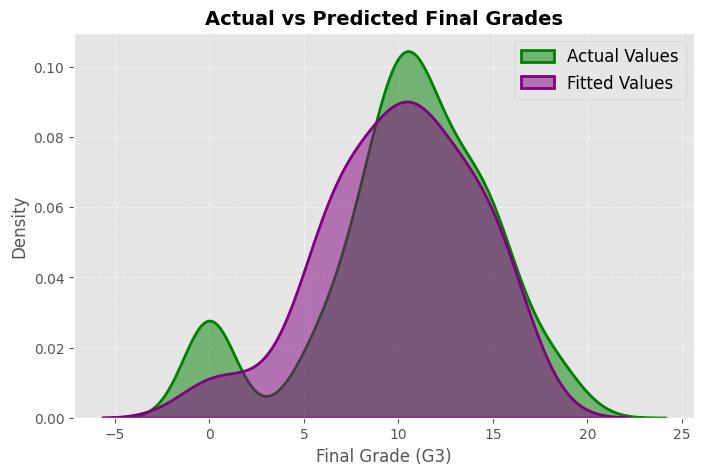

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set ggplot style for better visuals
plt.style.use("ggplot")

# Create figure and axis
plt.figure(figsize=(8, 5))

# Plot Actual Values
sns.kdeplot(y, color="g", label="Actual Values", fill=True, alpha=0.5, linewidth=2)

# Plot Fitted Values
sns.kdeplot(y_pred, color="purple", label="Fitted Values", fill=True, alpha=0.5, linewidth=2)

# Titles and Labels
plt.title("Actual vs Predicted Final Grades", fontsize=14, fontweight="bold")
plt.xlabel("Final Grade (G3)", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Grid and Legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)

# Show Plot
plt.show()


**Add Training with Other Models: Polynomial Regression**
Polynomial regression helps capture non-linear relationships between features and the target variable.


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Transform features to polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate Polynomial Regression
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Performance:")
print("MAE:", mae_poly)
print("R² Score:", r2_poly)


Polynomial Regression Performance:
MAE: 1.7143819689052902
R² Score: 0.7726422413528231


**Random Forest Regressor (A Powerful Ensemble Model)**

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MAE:", mae_rf)
print("R² Score:", r2_rf)


Random Forest Performance:
MAE: 1.028
R² Score: 0.9105218441429281


**Combine the Models for a Comparison:**

In [18]:
# Calculate average accuracy for all models

# KNN Regressor
clf = KNeighborsRegressor(9)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = clf.score(X_test, y_test)

# Polynomial Regression
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
acc_poly = r2_score(y_test, y_pred_poly)

# Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = r2_score(y_test, y_pred_rf)

print(f"KNN R² Score: {acc_knn}")
print(f"Polynomial Regression R² Score: {acc_poly}")
print(f"Random Forest R² Score: {acc_rf}")


KNN R² Score: 0.834759498829337
Polynomial Regression R² Score: 0.7726422413528231
Random Forest R² Score: 0.9105218441429281


**Visualization & Conclusion**
After evaluating each model, let's visualize the performance:

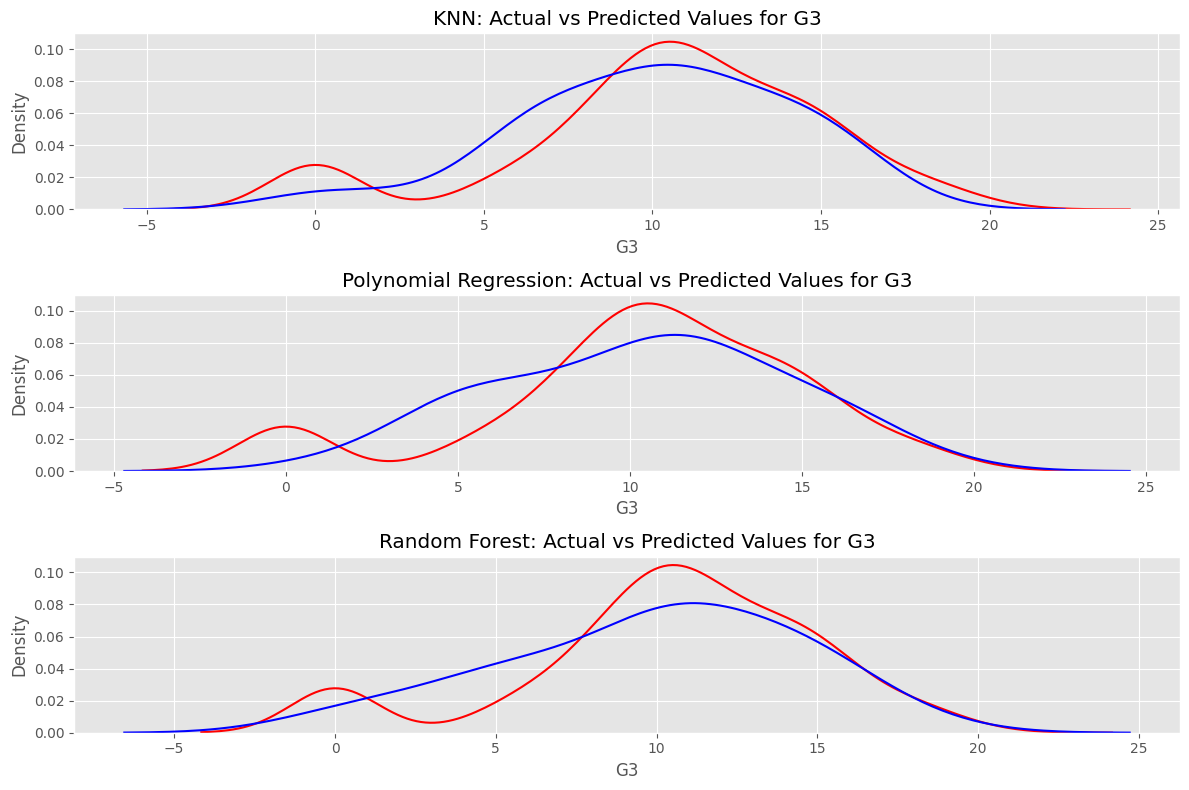

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Actual vs Predicted for all models
plt.figure(figsize=(12, 8))

# KNN
plt.subplot(3, 1, 1)
sns.kdeplot(y, color="r", label="Actual Value", fill=False)
sns.kdeplot(y_pred_knn, color="b", label="KNN Predicted Value", fill=False)
plt.title('KNN: Actual vs Predicted Values for G3')

# Polynomial Regression
plt.subplot(3, 1, 2)
sns.kdeplot(y, color="r", label="Actual Value", fill=False)
sns.kdeplot(y_pred_poly, color="b", label="Polynomial Regression Predicted Value", fill=False)
plt.title('Polynomial Regression: Actual vs Predicted Values for G3')

# Random Forest
plt.subplot(3, 1, 3)
sns.kdeplot(y, color="r", label="Actual Value", fill=False)
sns.kdeplot(y_pred_rf, color="b", label="Random Forest Predicted Value", fill=False)
plt.title('Random Forest: Actual vs Predicted Values for G3')

plt.tight_layout()
plt.show()


The distribution of the actual and predicted values appears to be similar across all three models, but the level of smoothness and the precise alignment of the predictions with the actual data might vary. The Polynomial Regression and Random Forest models seem to perform better than KNN in terms of capturing the general distribution and trends of G3.

From this lab, you can learn several key concepts related to machine learning and model evaluation:

## Model Comparison:

KNN, Polynomial Regression, and Random Forest:
You’ve applied three different algorithms (K-Nearest Neighbors, Polynomial Regression, and Random Forest) to predict student performance (G3). By comparing these models, you get a sense of how different algorithms can perform on the same dataset.
### How to select models: By comparing the actual vs predicted plots, you can assess how well each model generalizes to unseen data. This is important because it helps you choose the best model for the problem at hand.

## Overfitting vs. Underfitting:

Each plot shows how well the model fits the data. If the predicted values (blue curve) follow the actual values (red curve) closely, the model is likely well-fitted. However, if the predicted values deviate too much from the actual values, it could indicate overfitting or underfitting.
### Overfitting: A model that performs well on training data but poorly on new data.
### Underfitting: A model that fails to capture the underlying patterns in the data.

## Bias-Variance Tradeoff:

The KNN model might show higher bias (underfitting), as it struggles to capture complex patterns, especially in the tails of the distribution.
The Polynomial Regression and Random Forest models may show lower bias, but they can have higher variance, meaning they might fit the data too closely and may not generalize well to unseen data.

## Data Distribution Insights:

By visualizing the actual vs predicted distributions, you can identify if your model is biased toward certain values of G3 or if it's generalizing well. It helps you understand how the model behaves with different ranges of data.

## Model Selection and Tuning:

Through these plots, you might decide which model performs the best based on how closely the predicted values track the actual values. This could lead you to choose the best model for your problem, but it’s important to also evaluate the models using other metrics like accuracy, mean squared error, and R-squared.

## Next Steps:
### Model Tuning: You could experiment with hyperparameter tuning (for example, adjusting the number of neighbors in KNN or tree depth in Random Forest).
### Evaluate on Different Metrics: Use R-squared, mean squared error (MSE), or cross-validation to get a more robust evaluation of model performance.
### Feature Engineering: The performance of these models could improve with more features or better feature selection.